/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_85778/2676711486.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_85778/2676711486.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_85778/2676711486.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_85778/2676711486.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since M

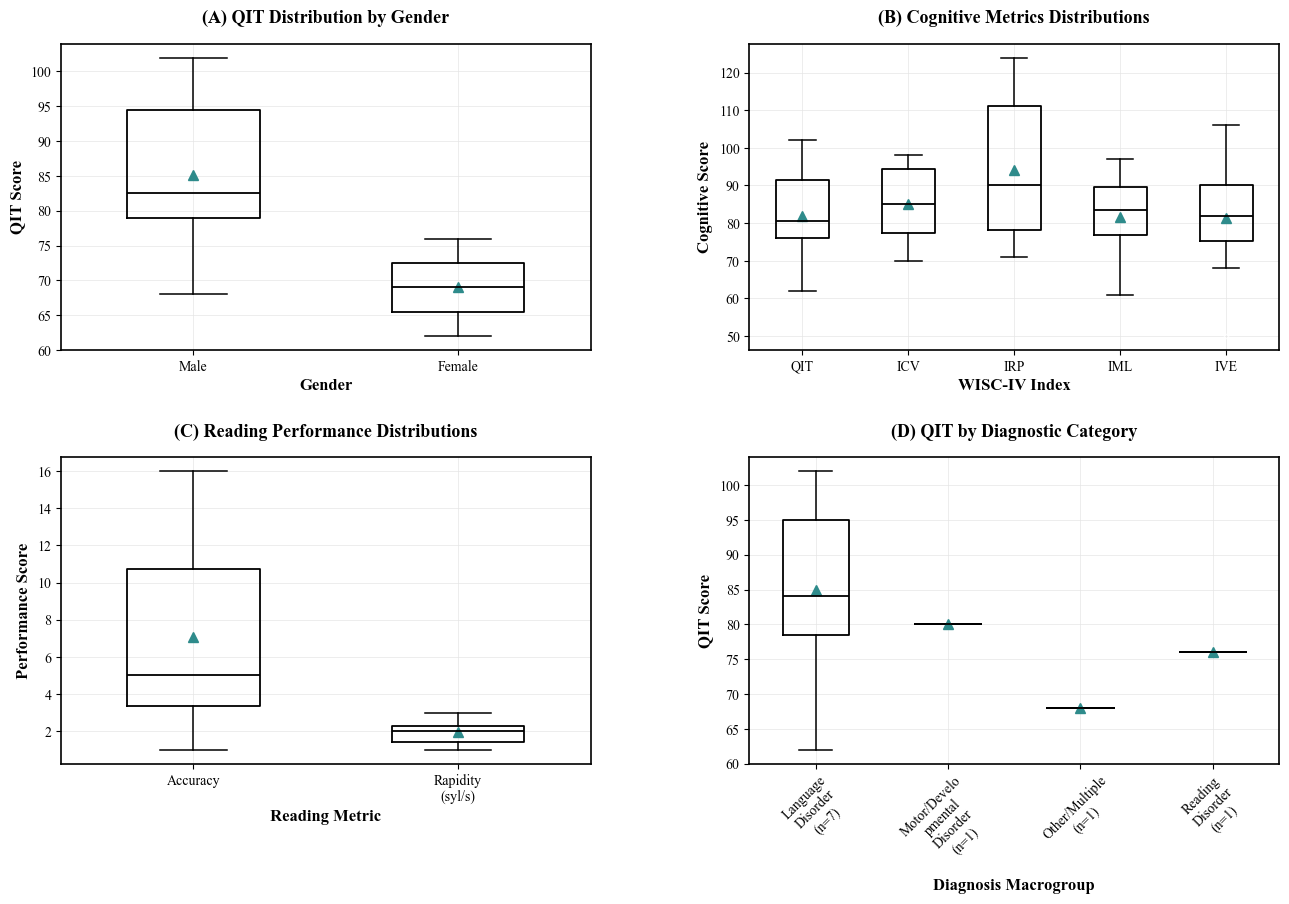

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap

# ---------- Load CSV ----------
csv_path = "/Users/Martina.Galletti/Downloads/dati-artis1/user_demographics/sample-users.xlsx - sample-characteristics.csv"
df = pd.read_csv(csv_path)
df.columns = [c.strip() for c in df.columns]

# Expected columns: ID, SESSO, CLASSE, DIAGNOSI, QIT, ICV, IRP, IML, IVE
wisc_cols = ["QIT","ICV","IRP","IML","IVE"]

# ---------- Derive diagnostic macrogroups ----------
def macro_from_diag(text: str) -> str:
    t = text.lower()
    if any(k in t for k in ["dislessia", "lettura", "reading"]):
        return "Reading Disorder (n={})"
    if any(k in t for k in ["linguaggio", "language", "f80"]):
        return "Language Disorder (n={})"
    if any(k in t for k in ["svilupp", "motor", "f83"]):
        return "Motor/Developmental Disorder (n={})"
    return "Other/Multiple (n={})"

macro = df["DIAGNOSI"].apply(macro_from_diag)
counts = macro.value_counts().to_dict()
order = [
    "Language Disorder (n={})",
    "Motor/Developmental Disorder (n={})",
    "Other/Multiple (n={})",
    "Reading Disorder (n={})"
]
order_labels = [o.format(counts.get(o,0)) for o in order if o in counts]
df["DiagMacro"] = [m.format(counts.get(m,0)) for m in macro]

# ---------- Placeholder reading data ----------
reading_df = pd.DataFrame({
    "Metric": ["Accuracy"]*6 + ["Rapidity (syl/s)"]*5,
    "Score":  [1,3,4.5,5.5,12.5,16, 1,1.4,2.0,2.3,3.0]
})

# ---------- Enhanced Style for PhD Thesis ----------
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.grid": True,
    "grid.color": "#E5E5E5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.6,
    "grid.alpha": 0.8
})

# Professional color scheme
TEAL = "#2E8B8B"
MEDIAN_COLOR = "#1F4E79"

# Global legend flag to add legend only once
legend_added = False

def boxplot_with_mean(ax, data_groups, labels, ylabel=None, xrot=0, wrap=None):
    if wrap:
        labels = ["\n".join(textwrap.wrap(l, wrap)) for l in labels]
    bp = ax.boxplot(
        data_groups,
        labels=labels,
        patch_artist=False,
        widths=0.5,
        medianprops=dict(color="black", linewidth=1.3),
        whiskerprops=dict(color="black", linewidth=1.1),
        capprops=dict(color="black", linewidth=1.1),
        boxprops=dict(color="black", linewidth=1.3),
        flierprops=dict(marker='o', markersize=3, color="gray", alpha=0.8)
    )
    # Mean triangles
    for i, g in enumerate(data_groups, 1):
        ax.plot(i, np.mean(g), marker="^", markersize=7, color=TEAL, label="Mean" if i == 1 else "")
    
    # Set Y-axis label with proper formatting
    if ylabel:
        ax.set_ylabel(ylabel, color="black", fontweight="bold", fontsize=12)
    
    ax.tick_params(axis='x', colors="black", rotation=xrot)
    ax.tick_params(axis='y', colors="black")
    for spine in ax.spines.values():
        spine.set_color("black")
    # Add median to legend (only once)
    ax.plot([], [], color="black", linewidth=1.3, label="Median")
    return bp

# ---------- Create Enhanced Figure ----------
fig = plt.figure(figsize=(14, 10))

# Create a more sophisticated grid layout with more space for legend
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3, 
                      left=0.08, right=0.95, top=0.90, bottom=0.18)

# (a) QIT by Gender
ax1 = fig.add_subplot(gs[0, 0])
groups = [df.loc[df["SESSO"]=="M","QIT"].values,
          df.loc[df["SESSO"]=="F","QIT"].values]
boxplot_with_mean(ax1, groups, ["Male", "Female"], ylabel="QIT Score")
ax1.set_title("(A) QIT Distribution by Gender", pad=15, color="black")
ax1.set_xlabel("Gender", color="black", fontweight="bold")

# ax = axs[0,0]
# groups = [df.loc[df["SESSO"]=="M","QIT"].values,
#           df.loc[df["SESSO"]=="F","QIT"].values]
# boxplot_with_mean(ax, groups, ["M","F"], ylabel="QIT")
# ax.set_title("(a) QIT by Gender", color="black")
# ax.set_xlabel("Gender", color="black")

# (b) Cognitive Metrics
ax2 = fig.add_subplot(gs[0, 1])
groups = [df[m].dropna().values for m in wisc_cols]
boxplot_with_mean(ax2, groups, wisc_cols, ylabel="Cognitive Score")
ax2.set_title("(B) Cognitive Metrics Distributions", pad=15, color="black")
ax2.set_xlabel("WISC-IV Index", fontweight="bold", color="black")

# (c) Reading Performance
ax3 = fig.add_subplot(gs[1, 0])
groups = [reading_df.loc[reading_df["Metric"]=="Accuracy","Score"].values,
          reading_df.loc[reading_df["Metric"]=="Rapidity (syl/s)","Score"].values]
boxplot_with_mean(ax3, groups, ["Accuracy", "Rapidity\n(syl/s)"], ylabel="Performance Score")
ax3.set_title("(C) Reading Performance Distributions", pad=15, color="black")
ax3.set_xlabel("Reading Metric", fontweight="bold", color="black")

# (d) QIT by Diagnosis Macrogroup
ax4 = fig.add_subplot(gs[1, 1])
grouped = df.groupby("DiagMacro")["QIT"].apply(list)
ordered_groups = [grouped[l] for l in order_labels if l in grouped.index]
# Create more readable labels for x-axis
readable_labels = []
for label in order_labels:
    base_label = label.split('(')[0].strip()
    n_count = label.split('n=')[1].split(')')[0]
    # Wrap long labels for better readability
    if len(base_label) > 15:
        wrapped_label = "\n".join(textwrap.wrap(base_label, 12))
    else:
        wrapped_label = base_label
    readable_labels.append(f"{wrapped_label}\n(n={n_count})")

boxplot_with_mean(ax4, ordered_groups, readable_labels, ylabel="QIT Score", xrot=45)
ax4.set_title("(D) QIT by Diagnostic Category", pad=15, color="black")
ax4.set_xlabel("Diagnosis Macrogroup", fontweight="bold", color="black")

# ---------- Enhanced Legend with better positioning ----------
handles, labels = ax1.get_legend_handles_labels()
# Remove any duplicate labels
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# fig.legend(unique_handles, unique_labels, 
#           loc="lower center", 
#           ncol=2, 
#           frameon=True,
#           fancybox=True,
#           shadow=True,
#           fontsize=12,
#           bbox_to_anchor=(0.5, 0.08),
#           edgecolor='black',
#           facecolor='white')

# ---------- Save with high quality ----------
plt.savefig("thesis_demographics_enhanced.png", 
           dpi=600, bbox_inches="tight", 
           facecolor="white", edgecolor="none")
plt.savefig("thesis_demographics_enhanced.pdf", 
           dpi=600, bbox_inches="tight", 
           facecolor="white", edgecolor="none")
plt.savefig("thesis_demographics_enhanced.eps", 
           dpi=600, bbox_inches="tight", 
           facecolor="white", edgecolor="none")

plt.show()